In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import metrics
import operator
from multiprocessing import Process
from multiprocessing import Pool
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB

!wget https://raw.githubusercontent.com/johnprogramming1010/SocialMADS/main/Social_Media_ads.csv
data = pd.read_csv("Social_Media_ads.csv", header=None)
data1 = data.to_numpy()

--2022-12-06 01:26:57--  https://raw.githubusercontent.com/johnprogramming1010/SocialMADS/main/Social_Media_ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27696 (27K) [text/plain]
Saving to: ‘Social_Media_ads.csv’

Social_Media_ads.cs 100%[===================>]  27.05K  --.-KB/s    in 0.004s  

2022-12-06 01:26:57 (6.72 MB/s) - ‘Social_Media_ads.csv’ saved [27696/27696]



In [ ]:
print(data1)
data2 = np.delete(data1, 0, axis=0)
print("\n")
print(data2)

[['Gender' 'Age' 'EstimatedSalary' 'Purchased']
 ['Male' '19' '19000' '0']
 ['Male' '35' '20000' '0']
 ...
 ['Female' '58' '55000' '0']
 ['Male' '30' '84000' '1']
 ['Female' '68' '165000' '0']]


[['Male' '19' '19000' '0']
 ['Male' '35' '20000' '0']
 ['Female' '26' '43000' '0']
 ...
 ['Female' '58' '55000' '0']
 ['Male' '30' '84000' '1']
 ['Female' '68' '165000' '0']]


In [ ]:
# using Gaussian Naive Bayes library
# https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/
accuracyGNB = 0
accuracy_list_GNB = []
import time
t1 = time.time()
for i in range(1000):
  from sklearn.utils import shuffle
  test = shuffle(data2)

  #changed my data to be able to solve it
  #male = 0
  #female = 1
  for i in range(1500):
    if(test[i][0] == "Male"):
      test[i][0] = 0
    if(test[i][0] == "Female"):
      test[i][0] = 1

  # initializing trainx and trainy with 80% of the data.
  trainX = test[:1200,:3]
  trainY = test[:1200,3]

  # testing on 20% of the data
  testX = test[300:,:3]
  testY = test[300:,3]

  #implementing Naive Bayes library
  gnb = GaussianNB()
  y_pred = gnb.fit(trainX, trainY).predict(testX)
  accuracy_list_GNB.append(gnb.score(testX, testY))
  accuracyGNB += (gnb.score(testX, testY)/(1000)) * 100
t2 = time.time()
overall_time = t2-t1

print("Naive Bayes score: ",accuracyGNB)
print("Time: ",overall_time)

Naive Bayes score:  58.53275000000003
Time:  9.271602630615234


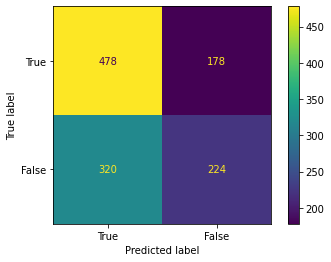

In [ ]:
#creating a confusion matrix of the results.
confusion_matrix = metrics.confusion_matrix(testY, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

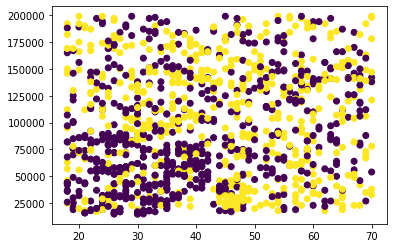

In [ ]:
import matplotlib.pyplot as plt

#plt.scatter(trainX[:,1:2].astype(float), trainY.astype(float), )
#plt.scatter(trainX[:,2:3].astype(float), trainY.astype(float), )
#plt.scatter(trainX[:,0:1].astype(float), trainY.astype(float), )

plt.scatter(trainX[:,1].astype(float), trainX[:,2].astype(float), c=trainY.astype(float))

# each feature is independent of each other. 50% of the data consists
# adds gender + age + salary to predict bought or unbought.
# as you can see there is roughly 50% of each value on 0 and 1

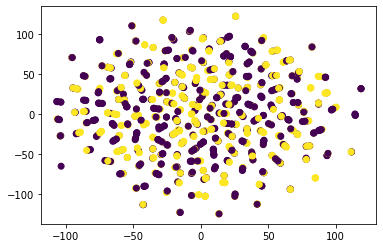

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(trainX.astype(float))

plt.scatter(X_embedded[:,0].astype(float), X_embedded[:,1].astype(float), c=trainY.astype(float))

In [ ]:
#Second method nearest neighbors algorithmn
#https://scikit-learn.org/stable/modules/neighbors.html
#I used this to help me solve this

# #trying to classify as passed or bought

import time
t1_KNN = time.time()
accuracyKNN = 0
accuracy_list_KNN = []
for i in range(1000):
  from sklearn.utils import shuffle
  test = shuffle(data2)

  #changed my data to be able to solve it
  #male = 0
  #female = 1
  for i in range(1500):
    if(test[i][0] == "Male"):
      test[i][0] = 0
    if(test[i][0] == "Female"):
      test[i][0] = 1

  # initializing trainx and trainy with 80% of the data.
  trainX = test[:1200,:3]
  trainY = test[:1200,3]

  # testing on 20% of the data
  testX = test[300:,:3]
  testY = test[300:,3]

  test = shuffle(data2)
  #implementing nearest neighbors library
  KNN = KNeighborsClassifier(n_neighbors = 1)
  KNN.fit(trainX, trainY)
  Prediction = KNN.predict(testX)
  accuracy_list_KNN.append(accuracy_score(testY, Prediction))
  accuracyKNN += (accuracy_score(testY, Prediction)/(1000)) * 100
t2_KNN = time.time()
overall_time_KNN = t2-t1
print("Naive Bayes score: ",accuracyKNN)
print("Time: ",overall_time)

Naive Bayes score:  88.53391666666661
Time:  13.79115605354309


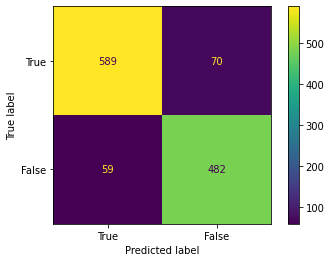

In [ ]:
#creating a confusion matrix of the results.
confusion_matrix = metrics.confusion_matrix(testY, Prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

Text(0, 0.5, 'Percent Correct')

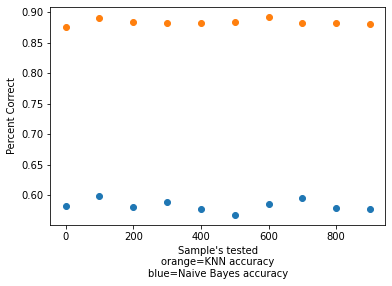

In [ ]:
iterations  = list(range(0,1000,100))
plt.scatter(iterations, accuracy_list_GNB[0:1001:100])
plt.scatter(iterations, accuracy_list_KNN[0:1001:100])  

plt.xlabel("Sample's tested\norange=KNN accuracy\nblue=Naive Bayes accuracy")
plt.ylabel("Percent Correct")